In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./../data/toy_data.csv', index_col=0)

df.dtypes

timestamp         object
icao24            object
latitude         float64
longitude        float64
ground_speed     float64
track            float64
vertical_rate    float64
callsign          object
onground            bool
alert               bool
spi                 bool
squawk           float64
baro_altitude    float64
altitude         float64
last_position     object
hour               int64
dtype: object

In [3]:
df.head()

,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,callsign,onground,alert,spi,squawk,baro_altitude,altitude,last_position,hour
0,2023-01-01 11:22:16,484f18,41.290329,2.092209,NaN,NaN,NaN,KLM86N,True,False,False,NaN,NaN,NaN,2023-01-01 11:22:11.095,1672567200
1,2023-01-01 11:22:17,484f18,41.290329,2.092209,NaN,NaN,NaN,KLM86N,True,False,False,NaN,NaN,NaN,2023-01-01 11:22:11.095,1672567200
2,2023-01-01 11:22:18,484f18,41.290329,2.092209,NaN,NaN,NaN,KLM86N,True,False,False,NaN,NaN,NaN,2023-01-01 11:22:11.095,1672567200
3,2023-01-01 11:22:19,484f18,41.290329,2.092209,NaN,NaN,NaN,KLM86N,True,False,False,NaN,NaN,NaN,2023-01-01 11:22:11.095,1672567200
4,2023-01-01 11:22:20,484f18,41.290329,2.092209,NaN,NaN,NaN,KLM86N,True,False,False,NaN,NaN,NaN,2023-01-01 11:22:11.095,1672567200


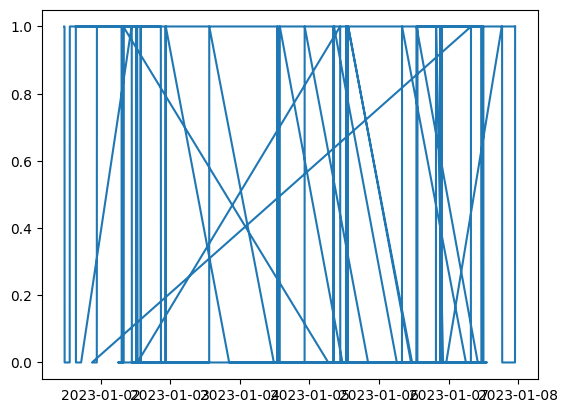

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.plot(df['timestamp'], df['onground'])
plt.show()

In [5]:
df['callsign'].value_counts()

callsign
KLM86N    48122
N96UA     40666
KLM76T    40268
TRA3A     38767
KLM18S    26635
Name: count, dtype: int64

In [6]:
df[df['callsign'] == "N96UA"].head()

,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,callsign,onground,alert,spi,squawk,baro_altitude,altitude,last_position,hour
48122,2023-01-04 21:38:39,ad5b90,39.174225,-76.679615,161.523852,274.616352,2048.0,N96UA,False,False,False,NaN,500.0,250.0,2023-01-04 21:38:38.427,1672862400
48123,2023-01-04 21:38:40,ad5b90,39.174313,-76.680603,161.523852,274.616352,2048.0,N96UA,False,False,False,NaN,525.0,250.0,2023-01-04 21:38:39.648,1672862400
48124,2023-01-04 21:38:41,ad5b90,39.174362,-76.681525,162.520627,274.587978,2112.0,N96UA,False,False,False,NaN,550.0,300.0,2023-01-04 21:38:40.417,1672862400
48125,2023-01-04 21:38:42,ad5b90,39.174453,-76.682861,163.440980,274.210498,2112.0,N96UA,False,False,False,NaN,575.0,350.0,2023-01-04 21:38:41.941,1672862400
48126,2023-01-04 21:38:43,ad5b90,39.174453,-76.683289,165.435645,274.159642,2176.0,N96UA,False,False,False,NaN,600.0,400.0,2023-01-04 21:38:42.506,1672862400


In [7]:
df = df.drop(df[df['callsign'] == "N96UA"].index)

In [8]:
df.shape

(153792, 16)

In [9]:
df = df.drop(df[df['onground'] == True].index)

In [10]:
df1 = df[df['callsign'] == "KLM86N"]

In [11]:
df1 = df1[(df1['vertical_rate'] > -1000) & (df1['vertical_rate'] < 1000) & (df1['altitude'] > 10000) & (df1['baro_altitude'] > 10000)]

In [12]:
df1.shape

(26112, 16)

In [13]:
df1.describe()

,timestamp,latitude,longitude,ground_speed,track,vertical_rate,squawk,baro_altitude,altitude,hour
count,26112,26112.000000,26112.000000,26112.000000,26112.000000,26112.000000,25976.000000,26112.000000,26112.000000,2.611200e+04
mean,2023-01-04 14:03:28.153147904,46.783256,1.538953,463.838127,150.502060,-44.865196,5447.876309,35472.867839,35684.499464,1.672836e+09
min,2023-01-01 11:31:30,41.253571,0.724182,151.327329,0.000000,-960.000000,23.000000,10025.000000,10025.000000,1.672567e+09
25%,2023-01-03 11:53:10.750000128,44.775125,1.122044,436.645933,11.309932,-64.000000,5355.000000,34000.000000,33575.000000,1.672740e+09
50%,2023-01-04 12:37:34.500000,46.751528,1.302773,463.318065,30.434236,0.000000,5372.000000,38000.000000,38025.000000,1.672830e+09
75%,2023-01-06 11:52:37.249999872,48.756592,1.674218,484.594257,352.687845,0.000000,5564.000000,40000.000000,40225.000000,1.672999e+09
max,2023-01-07 13:04:24,52.395801,4.921169,587.817491,359.869783,960.000000,7675.000000,63600.000000,106400.000000,1.673093e+09
std,NaN,2.413572,0.699812,46.098087,164.347619,263.165574,126.230884,6544.128339,6476.185132,1.652306e+05


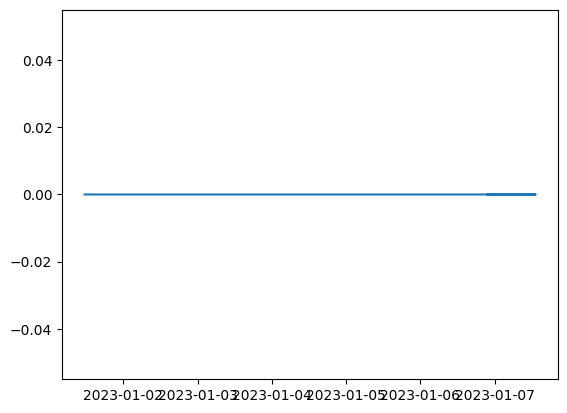

In [14]:
plt.plot(df['timestamp'], df['onground'])
plt.show()